# Data Prep and Cleaning

## Import Libraries and Packages

In [ ]:
## Import Packages/Libraries

# json cleaning
import requests
# data format
import json
# regular expressions for specific manipulations
import re
# working with data frames
import pandas as pd
from pandas import DataFrame
# method for tokenizing, vectorizing, and changing into data frame
# for creating corpus on computer
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
from bs4 import BeautifulSoup 
#Beautiful Soup is used to parse and prettify raw web data
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hisie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Getting NewsAPI data

In [96]:
# CODING THE API

# create variable containing the api endpoint
End="https://newsapi.org/v2/everything"

In [97]:
# API Request for Banned Books
# create a dictionary containing the parameters for the api request for banned books
banned_books_URL = {'apiKey': 'ffc38260b8de4233ace9feafdfdfd33e',
           'sortBy': 'top',
           'q': 'banned books'}
# make the request to get the json data
banned_books_response=requests.get(End, banned_books_URL)
#confirm it request ran
print(banned_books_response) 
# save as json data
banned_books_json = banned_books_response.json()
# print the json output of the data
print(banned_books_json) 

<Response [200]>
{'status': 'ok', 'totalResults': 312, 'articles': [{'source': {'id': 'business-insider', 'name': 'Business Insider'}, 'author': 'Talia Lakritz', 'title': "Barnes & Noble plans to open at least 60 new stores in 2025. I visited the bookseller to see why it's thriving.", 'description': 'Barnes & Noble has leaned into the popularity of book-themed content on TikTok, also known as "BookTok."', 'url': 'https://www.businessinsider.com/barnes-and-noble-stores-tiktok-cafes-2025-2', 'urlToImage': 'https://i.insider.com/67ab78777bb3f854015c7a79?width=1200&format=jpeg', 'publishedAt': '2025-02-11T16:28:27Z', 'content': 'Barnes & Noble is expanding.Mike Segar/Reuters\r\n<ul><li>Barnes & Noble plans to open at least 60 new stores in 2025.</li><li>The bookseller credits the virality of TikTok book content, also known as … [+7781 chars]'}, {'source': {'id': None, 'name': 'NPR'}, 'author': 'John Ruwitch', 'title': '5 years after Fang Fang recorded Wuhan lockdown, 2 of her books are bei

In [98]:
# API Request for new_books Articles
# create a dictionary containing the parameters for the api request for the key word new_books
new_books_URL = {'apiKey': 'ffc38260b8de4233ace9feafdfdfd33e',
           'sortBy': 'top',
           'q': 'new books'}
# make the request to get the json data
new_books_response=requests.get(End, new_books_URL)
#confirm it request ran
print(new_books_response) 
# save as json data
new_books_json = new_books_response.json()
# print the json output of the data
print(new_books_json) 

<Response [200]>
{'status': 'ok', 'totalResults': 8020, 'articles': [{'source': {'id': None, 'name': 'Gizmodo.com'}, 'author': 'Thomas Maxwell', 'title': 'Bookshop.org’s New E-Book Store Will Have a Tough Time Taking on Amazon', 'description': 'The company is initially launching apps on Android, iOS, and the web with dreams of someday creating an e-reader of its own.', 'url': 'https://gizmodo.com/bookshop-orgs-new-e-book-store-will-have-a-tough-time-against-amazon-2000555881', 'urlToImage': 'https://gizmodo.com/app/uploads/2022/08/ef00ba177019afcaa85c0b49a35a6557.jpg', 'publishedAt': '2025-01-28T20:25:32Z', 'content': 'Bookshop.org, the benevolent alternative to Amazon for online book purchases, has entered the e-book game. The company announced today the launch of its own e-book store along with a reader app for A… [+4018 chars]'}, {'source': {'id': 'the-verge', 'name': 'The Verge'}, 'author': 'Charles Pulliam-Moore', 'title': 'A24’s Opus blurs the line between fandom and faith in fir

### Cleaning the JSON

In [99]:
# create a new csv file to save data to
banned_books_filename='BannedBooksNews.csv'
# open the file to write it
MyFILE=open(banned_books_filename, 'w')
# place the column names in -write to the first row
WriteThis='Date,Source,Title,Description\n'
MyFILE.write(WriteThis)
# close the file
MyFILE.close()

In [100]:
# create a new csv file to save data to
new_books_filename='NewBooksNews.csv'
# open the file to write it
MyFILE=open(new_books_filename, 'w')
# place the column names in -write to the first row
WriteThis='Date,Source,Title,Description\n'
MyFILE.write(WriteThis)
# close the file
MyFILE.close()

In [101]:
# create a function to edit json text data
def edit_json(filename, jsontxt):
    # open file to add the edited text in
    MyFILE=open(filename, "a")
    # go through each part of the json text
    for items in jsontxt["articles"]:
        #print(items, "\n\n\n")

        # clean the source by getting the name of it
        Source=items["source"]["name"]
        #print(Source)

        # clean the date
        Date=items["publishedAt"]
        NewDate=Date.split("T")
        Date=NewDate[0]
        #print(Date)

        # clean the Title
        Title=items["title"]
        # Replace punctuation with space
        Title=re.sub(r'[,.;@#?!&$\-\']+', ' ', Title, flags=re.IGNORECASE)
        # Accept one or more copies of punctuation plus zero or more copies of a space and replace it with a single space
        Title=re.sub(' +', ' ', Title, flags=re.IGNORECASE)
        Title=re.sub(r'\"', ' ', Title, flags=re.IGNORECASE)
        Title=re.sub(r'[^a-zA-Z]', " ", Title, flags=re.VERBOSE)
        # remove commas
        Title=Title.replace(',', '')
        Title=' '.join(Title.split())
        # remove other unwanted characters
        Title=re.sub("\n|\r", "", Title)

        # clean the description
        Description=str(items["description"])
        # replace puntuation with space
        Description=re.sub(r'[,.;@#?!&$\-\']+', ' ', Description, flags=re.IGNORECASE)
        # Accept one or more copies of punctuation plus zero or more copies of a space and replace it with a single space
        Description=re.sub(' +', ' ', Description, flags=re.IGNORECASE)
        Description=re.sub(r'\"', ' ', Description, flags=re.IGNORECASE)
        Description=re.sub(r'[^a-zA-Z]', " ", Description, flags=re.VERBOSE)
        # remove all commas
        Description=Description.replace(',', '')
        Description=' '.join(Description.split())
        # remove other unwanted characters
        Description=re.sub("\n|\r", "", Description)

        #print("Title: ", Title, "\n")
        #print("Headline News Item: ", Description, "\n\n")
        
        # create string with the Date, Source, Title, and Description to write into csv
        WriteThis=str(Date)+","+str(Source)+","+ str(Title) + "," + str(Description) + "\n"
        #write into the csv
        MyFILE.write(WriteThis)
    
    ## CLOSE THE FILE
    MyFILE.close()


In [102]:
# call the function to clean the json and add to csv for banned books
edit_json(banned_books_filename, banned_books_json)

# call the function to clean the json and add to csv for new_books articles
edit_json(new_books_filename, new_books_json)

### Creating a Corpus

In [103]:
# function for getting the description list from the csv
def get_description_list(filename):
    # create a data frame from the csv file
    df = pd.read_csv(filename)

    # remove rows with na
    df = df.dropna()
    
    # create the list of descriptions
    descriptions=[]
    for description in df["Description"]:
        descriptions.append(description)

    # return the list
    return descriptions

In [104]:
# get banned_books descriptions using function
banned_books_descriptions=get_description_list(banned_books_filename)

# get new_books descriptions using function
new_books_descriptions=get_description_list(new_books_filename)

In [105]:
# create function for creating corpus from a list of descriptions and Label
def create_corpus(descriptions, Label, path):
    # start index at one
    index = 1
    # iterate through each article's description
    for article in descriptions:
        # Use the article's index for the filename (Label1, Label2, etc.)
        file_name = f"{Label}{index}.txt"
        file_path = os.path.join(path, file_name)
        
        # Get the article content (you can adjust this if you want other parts like title or description too)
        article_content = descriptions[index-1]
        
        # Write the content into the file
        with open(file_path, 'w', encoding='utf-8') as file:
            file.write(article_content)

        print(f"Written article {index} to {file_path}")

        # increase index
        index += 1

In [106]:
# create path to corpus 
path="C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Books_News"

# add banned books descriptions to corpus with the label "books"
create_corpus(banned_books_descriptions, "banned_books_news", path)

# add new_books descriptions to corpus with the label "new_books"
create_corpus(new_books_descriptions, "new_books_news", path)

Written article 1 to C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Books_News\banned_books_news1.txt
Written article 2 to C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Books_News\banned_books_news2.txt
Written article 3 to C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Books_News\banned_books_news3.txt
Written article 4 to C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Books_News\banned_books_news4.txt
Written article 5 to C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Books_News\banned_books_news5.txt
Written article 6 to C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Books_News\banned_books_news6.txt
Written article 7 to C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Books_News\banned_books_news7.txt
Written article 8 to C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Books_News\banned_books_news8.txt
Written article 9 to C:/Users/hisie/OneDrive/Documents/CU Boulde

### Creating a CSV

In [107]:
# create path to save the CSV file
csv_filename = "C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Books_News.csv"

# open the file to append it
MyFILE=open(csv_filename, "a")

# add column titles
WriteThis="Label,Description\n"
MyFILE.write(WriteThis)
    
# add each banned_book description with label "Book"
for banned_books_description in banned_books_descriptions:
    WriteThis="Banned_News," + banned_books_description + "\n"
    MyFILE.write(WriteThis)

# add each new_books description with label "new_books"
for new_books_description in new_books_descriptions:
    WriteThis="New_News," + new_books_description + "\n"
    MyFILE.write(WriteThis)

# close the file
MyFILE.close()

### Creating df from Corpus

In [108]:
# create lemmatizer to use
from nltk.stem import WordNetLemmatizer 
my_lemmer = WordNetLemmatizer() 

# create stemmer to use
from nltk.stem.porter import PorterStemmer
my_stemmer = PorterStemmer()

In [109]:
# use the stemmer in a function on a list of words
def MY_STEMMER(str_input):
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [my_stemmer.stem(word) for word in words]
    return [word for word in words if len(word) > 2]  # Only include words longer than 2 characters

# use the lemmer in a function on a list of words
def MY_LEMMER(str_input):
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [my_lemmer.lemmatize(word) for word in words]
    return [word for word in words if len(word) > 2]  # Only include words longer than 2 characters

In [110]:
# create a list of file paths
file_paths = []
# also want a list of file_names
file_names = []
# iterate through each file in the directory and add its full path to the list
for name in os.listdir(path):
    # create the full path for each file
    # recall we already have path="C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Book-Woke"
    file_path = path + "/" + name  
    # add the full path to the list
    file_paths.append(file_path) 
    
    # extract the file name
    file_name=name.split(".") 
    # add the file name to the list
    file_names.append(file_name[0])

In [111]:
# use count vectorizer to create a df with 50 columns

# initialize the vectorizer using filename as the input
# note, words with numbers removed in earlier cleaning
my_cv1=CountVectorizer(input='filename', 
                        stop_words='english', #remove stop words
                        max_features=50 ,
                        tokenizer=MY_LEMMER 
                        )

## vectorize using file_paths
corpus_matrix=my_cv1.fit_transform(file_paths)

# get the column names from the features
corp_col_names=my_cv1.get_feature_names_out()

# create a data frame with the corpus matrix and the column names
corp_bw_df=pd.DataFrame(corpus_matrix.toarray(),columns=corp_col_names)
print(corp_bw_df.head())  

C:\Users\hisie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


   amazon  american  app  appeared  apple  author  ban  banned  big  book  \
0       0         0    0         0      0       0    0       0    0     1   
1       0         0    0         0      0       0    0       0    0     1   
2       0         0    0         0      0       0    0       0    0     0   
3       0         0    0         0      0       0    0       0    0     0   
4       0         0    0         0      0       0    0       0    0     0   

   ...  supreme  taking  tiktok  time  trump  week  world  writer  year  \
0  ...        0       0       1     0      0     0      0       0     0   
1  ...        0       0       0     0      0     0      0       0     0   
2  ...        0       0       0     0      0     0      0       0     0   
3  ...        0       0       0     0      0     0      0       0     0   
4  ...        0       0       0     0      0     0      0       0     0   

   yorker  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 50 

In [112]:
# add labels to the df
label_dict = {}

# create dictionary using file name
for i in range(0, len(file_names)):
    # add file name as key but remove the numbers at the end
    label_dict[i] = file_names[i].rstrip('0123456789')

print("MY DICT:", label_dict) 

MY DICT: {0: 'banned_books_news', 1: 'banned_books_news', 2: 'banned_books_news', 3: 'banned_books_news', 4: 'banned_books_news', 5: 'banned_books_news', 6: 'banned_books_news', 7: 'banned_books_news', 8: 'banned_books_news', 9: 'banned_books_news', 10: 'banned_books_news', 11: 'banned_books_news', 12: 'banned_books_news', 13: 'banned_books_news', 14: 'banned_books_news', 15: 'banned_books_news', 16: 'banned_books_news', 17: 'banned_books_news', 18: 'banned_books_news', 19: 'banned_books_news', 20: 'banned_books_news', 21: 'banned_books_news', 22: 'banned_books_news', 23: 'banned_books_news', 24: 'banned_books_news', 25: 'banned_books_news', 26: 'banned_books_news', 27: 'banned_books_news', 28: 'banned_books_news', 29: 'banned_books_news', 30: 'banned_books_news', 31: 'banned_books_news', 32: 'banned_books_news', 33: 'banned_books_news', 34: 'banned_books_news', 35: 'banned_books_news', 36: 'banned_books_news', 37: 'banned_books_news', 38: 'banned_books_news', 39: 'banned_books_news', 

In [113]:
# add labels to df
labels_list=list(label_dict.values())

labeled_corp_bw_df=corp_bw_df.copy()
#CorpusDF_DogHike["LABEL"] = gb_html_list
labeled_corp_bw_df.insert(loc=0, column='LABEL', value=labels_list)
print(labeled_corp_bw_df)

                 LABEL  amazon  american  app  appeared  apple  author  ban  \
0    banned_books_news       0         0    0         0      0       0    0   
1    banned_books_news       0         0    0         0      0       0    0   
2    banned_books_news       0         0    0         0      0       0    0   
3    banned_books_news       0         0    0         0      0       0    0   
4    banned_books_news       0         0    0         0      0       0    0   
..                 ...     ...       ...  ...       ...    ...     ...  ...   
189     new_books_news       0         0    0         0      0       0    0   
190     new_books_news       0         0    0         0      0       0    0   
191     new_books_news       0         0    0         0      0       0    0   
192     new_books_news       0         0    0         0      0       0    0   
193     new_books_news       0         0    0         0      0       0    0   

     banned  big  ...  supreme  taking  tiktok  tim

### Creating df from csv

In [114]:
# import csv as df
books_news_df = pd.read_csv('C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Books_News.csv')
# remove any rows containing na
books_news_df = books_news_df.dropna()

print(books_news_df)

# get the labels and descriptions as lists
labels = books_news_df['Label'].tolist()

descriptions = books_news_df['Description'].tolist()

# clean descriptions
index = 0
for description in descriptions:
    # remove numbers and words that contain numbers
    description = re.sub(r'\w*\d\w*', '', description)
    description = re.sub(r'\d+', '', description)
    # remove words smaller than 4 characters or larger than 10 characters
    description = ' '.join([wd for wd in description.split() if len(wd)>2] )

    descriptions[index] = description
    index += 1

# print the length of the descriptiosn list
print(len(descriptions))

           Label                                        Description
0    Banned_News  Barnes Noble has leaned into the popularity of...
1    Banned_News  Chinese author Fang Fang posted notes online w...
2    Banned_News  Even though the government was successful in g...
3    Banned_News  Making distributing or consuming pornographic ...
4    Banned_News  DeepSeek has the potential to shape the views ...
..           ...                                                ...
189     New_News  Seasons of the sci fi standout may be leaving ...
190     New_News  When I got my own apartment during my separati...
191     New_News  Olympic medalist and co creator of Beam Kids S...
192     New_News  Rachel Aviv on letters written between the New...
193     New_News  For our latest lookbook we ve gathered eight i...

[194 rows x 2 columns]
194


In [115]:
# use count vectorizer to create a df with 1000 columns

# initialize the CountVectorizer
my_cv=CountVectorizer(
        input="content", 
        lowercase=True, 
        stop_words = "english",
        max_features=1000,
        tokenizer=MY_LEMMER
        )

# fit and transform the data
description_matrix = my_cv.fit_transform(descriptions)  
# get the vocab from the matrix
vocab = my_cv.get_feature_names_out()

# convert the sparse matrix into a regular array
description_matrix = description_matrix.toarray()  

# use the covab as the column names
col_names=my_cv.get_feature_names_out()
# create a data frame with the array
description_matrix_df=pd.DataFrame(description_matrix,columns=col_names)
print(description_matrix_df.head())

   abolish  absolutely  account  action  activist  actor  actress  actually  \
0        0           0        0       0         0      0        0         0   
1        0           0        0       0         0      0        0         0   
2        0           0        0       0         0      0        0         0   
3        0           0        0       0         0      0        0         0   
4        0           0        0       0         0      0        0         0   

   adaptation  adapted  ...  written  wrote  wuhan  xinjiang  yaged  yarros  \
0           0        0  ...        0      0      0         0      0       0   
1           0        0  ...        0      0      2         0      0       0   
2           0        0  ...        0      0      0         0      0       0   
3           0        0  ...        0      0      0         0      0       0   
4           0        0  ...        0      0      0         0      0       0   

   year  york  yorker  zero  
0     0     0       

C:\Users\hisie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [116]:
# add the labels to the df
# Convert the labels from list to df
labels_df = DataFrame(labels,columns=['LABEL'])

# add labeled df to books_news_df
dfs = [labels_df, description_matrix_df]
labeled_books_news_df = pd.concat(dfs,axis=1, join='inner')

# DF with labels
print(labeled_books_news_df)

           LABEL  abolish  absolutely  account  action  activist  actor  \
0    Banned_News        0           0        0       0         0      0   
1    Banned_News        0           0        0       0         0      0   
2    Banned_News        0           0        0       0         0      0   
3    Banned_News        0           0        0       0         0      0   
4    Banned_News        0           0        0       0         0      0   
..           ...      ...         ...      ...     ...       ...    ...   
189     New_News        0           0        0       0         0      0   
190     New_News        0           0        0       0         0      0   
191     New_News        0           0        0       0         0      0   
192     New_News        0           0        0       0         0      0   
193     New_News        0           0        0       0         0      0   

     actress  actually  adaptation  ...  written  wrote  wuhan  xinjiang  \
0          0         0 

REDDIT API

In [117]:
import praw

# Set up Reddit API client with your credentials
reddit = praw.Reddit(
    client_id='3UT3qYLS7JcRWsx6JW8YHg',
    client_secret='npV-tefZJZ2BNE9tbQ7dx_BmH6OOFQ',
    user_agent='"my_banned_books_app:v1.0 (by /u/thestrose)"'
)

# Search for posts related to banned books in the 'books' subreddit
subreddit = reddit.subreddit('books')
search_results = subreddit.search('banned books', sort='relevance', time_filter='all', limit=10)

# create list of titles
titles = []
# create list of comments
comments = []

# Print the results
for post in search_results:
    print(f"Title: {post.title}")
    titles.append(post.title)
    print(f"URL: {post.url}")
    print(f"Author: {post.author}")
    print(f"Score: {post.score}")
    print(f"Comments: {post.num_comments}")
    print("------------")

    # Fetch and print the comments
    post.comments.replace_more(limit=0)
    for comment in post.comments.list():
        print(f"Comment by {comment.author}: {comment.body}")
        comments.append(comment.body)
        print("------------")

Title: People who have read a "banned book" specifically because it was being targeted: What were your thoughts on the book or books you read?
URL: https://www.reddit.com/r/books/comments/1aemx6o/people_who_have_read_a_banned_book_specifically/
Author: FeelingNiceToday
Score: 232
Comments: 460
------------
Comment by PopEnvironmental1335: My religion teacher (private school) got really upset about interview with a vampire so I read it. I don’t know if the school had banned the book, but we were told it was evil.  The book was ok. I didn’t really get why my teacher was upset and ultimately decided that she probably hadn’t read it. My mom thought the whole thing was very funny.
------------
Comment by None: Even though I'd read it in high school 20 plus years ago, I picked up **Maus** again, both volumed and read. Still a favorite to this day.
------------
Comment by is-your-oven-on: I read The Bluest Eye by Toni Morrison. It was a really great book, the kind of book that illustrated the

In [118]:
reddit_banned_descriptions = []
reddit_banned_descriptions.append(titles)
reddit_banned_descriptions.append(comments)

# fix list to be flattened
reddit_banned_descriptions = [item for sublist in reddit_banned_descriptions for item in sublist]

# clean descriptions
index = 0
for description in reddit_banned_descriptions:
    #print(description)
    # replace puntuation with space
    description=re.sub(r'[,.;@#?!&$\-\']+', ' ', description, flags=re.IGNORECASE)
    # Accept one or more copies of punctuation plus zero or more copies of a space and replace it with a single space
    description=re.sub(' +', ' ', description, flags=re.IGNORECASE)
    description=re.sub(r'\"', ' ', description, flags=re.IGNORECASE)
    description=re.sub(r'[^a-zA-Z]', " ", description, flags=re.VERBOSE)
    # remove all commas
    description=description.replace(',', '')
    description=' '.join(description.split())
    # remove other unwanted characters
    description=re.sub("\n|\r", "", description)
    # remove numbers and words that contain numbers
    description = re.sub(r'\w*\d\w*', '', description)
    description = re.sub(r'\d+', '', description)
    # remove words smaller than 4 characters or larger than 10 characters
    description = ' '.join([wd for wd in description.split() if len(wd)>2] )

    reddit_banned_descriptions[index] = description
    index += 1

reddit_banned_df_data = []

for post in reddit_banned_descriptions:
    reddit_data = {}
    reddit_data['Label'] = "Banned_Reddit"
    reddit_data['Description'] = post
    reddit_banned_df_data.append(reddit_data)

# convert descriptions into df
reddit_banned_descriptions_df = DataFrame(reddit_banned_df_data)

# print head
print(reddit_banned_descriptions_df)

              Label                                        Description
0     Banned_Reddit  People who have read banned book specifically ...
1     Banned_Reddit  Utah students can longer bring personal copies...
2     Banned_Reddit  Utah outlaws books Judy Blume and Sarah Maas f...
3     Banned_Reddit  Multi level barrage book bans unprecedented sa...
4     Banned_Reddit  Texas book ban law causes school district remo...
...             ...                                                ...
4272  Banned_Reddit  mean who controls the state tho Politicians th...
4273  Banned_Reddit  You getting sharper the minute Maybe your bedtime
4274  Banned_Reddit                                            And axe
4275  Banned_Reddit                     That would imply they can read
4276  Banned_Reddit  Yes course political activism Oklahoma passed ...

[4277 rows x 2 columns]


In [119]:
# Search for posts related to new books in the 'books' subreddit
subreddit = reddit.subreddit('books')
search_results = subreddit.search('new books', sort='relevance', time_filter='all', limit=10)

# create list of titles
titles = []
# create list of comments
comments = []

# Print the results
for post in search_results:
    print(f"Title: {post.title}")
    titles.append(post.title)
    print(f"URL: {post.url}")
    print(f"Author: {post.author}")
    print(f"Score: {post.score}")
    print(f"Comments: {post.num_comments}")
    print("------------")

    # Fetch and print the comments
    post.comments.replace_more(limit=0)
    for comment in post.comments.list():
        print(f"Comment by {comment.author}: {comment.body}")
        comments.append(comment.body)
        print("------------")

Title: The New York Review of Books, and other literary reviews, are great ways to find the "best" books in what can broadly be classified as "The Humanities". What are the equivalent review authorities for informational non-fiction: Books on Carpentry? Stock Investing? Computer Science? Etc?
URL: https://www.reddit.com/r/books/comments/lwkzf2/the_new_york_review_of_books_and_other_literary/
Author: --Ty--
Score: 14
Comments: 5
------------
Comment by None: [deleted]
------------
Comment by Mission-Habit: I usually look up college class syllabi, most have a list of high quality recommended reading. Data from harvard, oxford etc. is very easy to find. You can find a college class on just about anything if you look hard enough. You can even email the professor (or department head) and say youre a student (not a lie) and alot of them will be happy to point you in the right direction. This is alot more fun and engaging that going to some curated list anyways.
------------
Comment by jyp-ho

In [120]:
reddit_new_descriptions = []
reddit_new_descriptions.append(titles)
reddit_new_descriptions.append(comments)

# fix list to be flattened
reddit_new_descriptions = [item for sublist in reddit_new_descriptions for item in sublist]

# clean descriptions
index = 0
for description in reddit_new_descriptions:
    #print(description)
    # replace puntuation with space
    description=re.sub(r'[,.;@#?!&$\-\']+', ' ', description, flags=re.IGNORECASE)
    # Accept one or more copies of punctuation plus zero or more copies of a space and replace it with a single space
    description=re.sub(' +', ' ', description, flags=re.IGNORECASE)
    description=re.sub(r'\"', ' ', description, flags=re.IGNORECASE)
    description=re.sub(r'[^a-zA-Z]', " ", description, flags=re.VERBOSE)
    # remove all commas
    description=description.replace(',', '')
    description=' '.join(description.split())
    # remove other unwanted characters
    description=re.sub("\n|\r", "", description)
    # remove numbers and words that contain numbers
    description = re.sub(r'\w*\d\w*', '', description)
    description = re.sub(r'\d+', '', description)
    # remove words smaller than 4 characters or larger than 10 characters
    description = ' '.join([wd for wd in description.split() if len(wd)>2] )

    reddit_new_descriptions[index] = description
    index += 1

reddit_new_df_data = []

for post in reddit_new_descriptions:
    reddit_data = {}
    reddit_data['Label'] = "New_Reddit"
    reddit_data['Description'] = post
    reddit_new_df_data.append(reddit_data)

# convert descriptions into df
reddit_new_descriptions_df = DataFrame(reddit_new_df_data)

# print head
print(reddit_new_descriptions_df)

           Label                                        Description
0     New_Reddit  The New York Review Books and other literary r...
1     New_Reddit                   hate the new Netflix signs books
2     New_Reddit    Dan Brown Announces New Book The Secret Secrets
3     New_Reddit  now illegal for Minnesota libraries ban LGBTQ ...
4     New_Reddit  Why some book fans are leaving Amazon owned Go...
...          ...                                                ...
3754  New_Reddit  sort like how the first Star Wars titled New Hope
3755  New_Reddit  Perfectly appropriate thread about Sanderson w...
3756  New_Reddit                                          RIP Miura
3757  New_Reddit  year old over here well feeling the same feels...
3758  New_Reddit  probably referencing Crichton crunch time The ...

[3759 rows x 2 columns]


In [121]:
# concatenate the two dfs
labeled_reddit_df = pd.concat([reddit_banned_descriptions_df, reddit_new_descriptions_df], ignore_index=True)

# print head
print(labeled_reddit_df)

              Label                                        Description
0     Banned_Reddit  People who have read banned book specifically ...
1     Banned_Reddit  Utah students can longer bring personal copies...
2     Banned_Reddit  Utah outlaws books Judy Blume and Sarah Maas f...
3     Banned_Reddit  Multi level barrage book bans unprecedented sa...
4     Banned_Reddit  Texas book ban law causes school district remo...
...             ...                                                ...
8031     New_Reddit  sort like how the first Star Wars titled New Hope
8032     New_Reddit  Perfectly appropriate thread about Sanderson w...
8033     New_Reddit                                          RIP Miura
8034     New_Reddit  year old over here well feeling the same feels...
8035     New_Reddit  probably referencing Crichton crunch time The ...

[8036 rows x 2 columns]


In [122]:
labeled_df = pd.concat([books_news_df, labeled_reddit_df], ignore_index=True)

print(labeled_df)

            Label                                        Description
0     Banned_News  Barnes Noble has leaned into the popularity of...
1     Banned_News  Chinese author Fang Fang posted notes online w...
2     Banned_News  Even though the government was successful in g...
3     Banned_News  Making distributing or consuming pornographic ...
4     Banned_News  DeepSeek has the potential to shape the views ...
...           ...                                                ...
8225   New_Reddit  sort like how the first Star Wars titled New Hope
8226   New_Reddit  Perfectly appropriate thread about Sanderson w...
8227   New_Reddit                                          RIP Miura
8228   New_Reddit  year old over here well feeling the same feels...
8229   New_Reddit  probably referencing Crichton crunch time The ...

[8230 rows x 2 columns]


In [124]:
# get the labels and descriptions as lists
all_labels = labeled_df['Label'].tolist()

all_descriptions = labeled_df['Description'].tolist()

# clean descriptions
index = 0
for description in all_descriptions:
    # remove numbers and words that contain numbers
    description = re.sub(r'\w*\d\w*', '', description)
    description = re.sub(r'\d+', '', description)
    # remove words smaller than 4 characters or larger than 10 characters
    description = ' '.join([wd for wd in description.split() if len(wd)>2] )

    all_descriptions[index] = description
    index += 1

# print the length of the descriptiosn list
print(len(all_descriptions))

8230


In [125]:
# fit and transform the data
all_description_matrix = my_cv.fit_transform(all_descriptions)  
# get the vocab from the matrix
all_vocab = my_cv.get_feature_names_out()

# convert the sparse matrix into a regular array
all_description_matrix = all_description_matrix.toarray()  

# use the covab as the column names
all_col_names=my_cv.get_feature_names_out()
# create a data frame with the array
all_description_matrix_df=pd.DataFrame(all_description_matrix,columns=col_names)
print(all_description_matrix_df.head())

C:\Users\hisie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


   abolish  absolutely  account  action  activist  actor  actress  actually  \
0        0           0        0       0         0      0        0         0   
1        0           0        0       0         0      0        0         0   
2        0           0        0       0         0      0        0         0   
3        0           0        0       0         0      0        0         0   
4        0           0        0       0         0      0        0         0   

   adaptation  adapted  ...  written  wrote  wuhan  xinjiang  yaged  yarros  \
0           0        0  ...        0      0      0         0      0       0   
1           0        0  ...        0      0      0         0      0       0   
2           0        0  ...        0      0      0         0      0       0   
3           0        0  ...        0      0      0         1      0       0   
4           0        0  ...        0      0      0         0      0       0   

   year  york  yorker  zero  
0     0     0       

In [126]:
# add the labels to the df
# Convert the labels from list to df
all_labels_df = DataFrame(all_labels,columns=['LABEL'])

# add labeled df to books_news_df
all_dfs = [all_labels_df, all_description_matrix_df]
all_labeled_books_news_df = pd.concat(all_dfs,axis=1, join='inner')

# DF with labels
print(all_labeled_books_news_df)

            LABEL  abolish  absolutely  account  action  activist  actor  \
0     Banned_News        0           0        0       0         0      0   
1     Banned_News        0           0        0       0         0      0   
2     Banned_News        0           0        0       0         0      0   
3     Banned_News        0           0        0       0         0      0   
4     Banned_News        0           0        0       0         0      0   
...           ...      ...         ...      ...     ...       ...    ...   
8225   New_Reddit        0           0        0       0         0      0   
8226   New_Reddit        0           0        0       0         0      0   
8227   New_Reddit        0           0        0       0         0      0   
8228   New_Reddit        0           0        0       0         0      0   
8229   New_Reddit        0           0        0       0         0      0   

      actress  actually  adaptation  ...  written  wrote  wuhan  xinjiang  \
0         

## TfidfVectorizer

In [61]:
# using the tfidfVectorizer options
tf_vect = TfidfVectorizer(input='filename', stop_words="english", max_features=50, min_df=3, token_pattern=r'\b\w{3,}\b', tokenizer=MY_STEMMER)
vect = tf_vect.fit_transform(file_paths)
tf_col_names = tf_vect.get_feature_names_out()
corp_df_tf = pd.DataFrame(vect.toarray(),columns=tf_col_names)
print(corp_df_tf)

     amazon  american  app  appear  appl  author  ban      book  come  comic  \
0       0.0       0.0  0.0     0.0   0.0     0.0  0.0  0.542583   0.0    0.0   
1       0.0       0.0  0.0     0.0   0.0     0.0  0.0  0.481317   0.0    0.0   
2       0.0       0.0  0.0     0.0   0.0     0.0  0.0  0.000000   0.0    0.0   
3       0.0       0.0  0.0     0.0   0.0     0.0  0.0  0.000000   0.0    0.0   
4       0.0       0.0  0.0     0.0   0.0     0.0  0.0  0.000000   0.0    0.0   
..      ...       ...  ...     ...   ...     ...  ...       ...   ...    ...   
189     0.0       0.0  0.0     0.0   0.0     0.0  0.0  0.000000   0.0    0.0   
190     0.0       0.0  0.0     0.0   0.0     0.0  0.0  0.000000   0.0    0.0   
191     0.0       0.0  0.0     0.0   0.0     0.0  0.0  0.000000   0.0    0.0   
192     0.0       0.0  0.0     0.0   0.0     0.0  0.0  0.000000   0.0    0.0   
193     0.0       0.0  0.0     0.0   0.0     0.0  0.0  0.000000   0.0    0.0   

     ...  thi    tiktok  time  trump   

C:\Users\hisie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\hisie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc'

In [62]:
# add labels to df
labels_list=list(label_dict.values())
labeled_tf_df = corp_df_tf.copy()
labeled_tf_df.insert(loc=0, column='LABEL', value=labels_list)
print(labeled_tf_df)

                 LABEL  amazon  american  app  appear  appl  author  ban  \
0    banned_books_news     0.0       0.0  0.0     0.0   0.0     0.0  0.0   
1    banned_books_news     0.0       0.0  0.0     0.0   0.0     0.0  0.0   
2    banned_books_news     0.0       0.0  0.0     0.0   0.0     0.0  0.0   
3    banned_books_news     0.0       0.0  0.0     0.0   0.0     0.0  0.0   
4    banned_books_news     0.0       0.0  0.0     0.0   0.0     0.0  0.0   
..                 ...     ...       ...  ...     ...   ...     ...  ...   
189     new_books_news     0.0       0.0  0.0     0.0   0.0     0.0  0.0   
190     new_books_news     0.0       0.0  0.0     0.0   0.0     0.0  0.0   
191     new_books_news     0.0       0.0  0.0     0.0   0.0     0.0  0.0   
192     new_books_news     0.0       0.0  0.0     0.0   0.0     0.0  0.0   
193     new_books_news     0.0       0.0  0.0     0.0   0.0     0.0  0.0   

         book  come  ...  thi    tiktok  time  trump       use  week  whi  \
0    0.542

In [ ]:
MyVect_STEM=CountVectorizer(input='filename',
                        analyzer = 'word',
                        stop_words='english',
                        tokenizer=MY_STEMMER,
                        lowercase = True,
                        max_features=10
                        )

Vect_Stem = MyVect_STEM.fit_transform(file_paths)
ColumnNames_s=MyVect_STEM.get_feature_names_out()
CorpusDF_Stem=pd.DataFrame(Vect_Stem.toarray(),columns=ColumnNames_s)
print(CorpusDF_Stem)

C:\Users\hisie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\hisie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'no

     ban  book  ha  new  read  s  thi  trump  wa  year
0      0     1   0    0     0  0    0      0   0     0
1      0     0   0    0     0  1    0      0   0     0
2      0     0   0    0     0  1    0      0   0     0
3      0     0   0    1     0  1    0      0   0     0
4      1     0   0    0     0  0    0      0   0     0
..   ...   ...  ..  ...   ... ..  ...    ...  ..   ...
189    0     0   0    0     0  0    0      0   1     0
190    0     0   0    0     0  0    0      0   0     0
191    0     0   0    1     0  0    0      0   0     0
192    0     0   1    0     0  0    0      0   0     0
193    0     0   0    1     0  0    0      0   0     1

[194 rows x 10 columns]


## WEBSCRAPING 

In [128]:
# set url to Google Book's banned books page
google_books_url = "https://books.google.com/googlebooks/banned/"
# request the data from the url
requested_data = requests.get(google_books_url)
google_books_html = requested_data.content
print(google_books_html)

b'<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<html>\n<head>\n<link rel="stylesheet" href="//www.google.com/css/header.css" nonce="_hEqhkDFIl8oW_LPaBDXJw"><title>Google Books: Celebrate Your Freedom to Read</title>\n<style>.header { margin: 20px 0 20px 0; }\n<!--\n.quote {font-size:11px}\n.title {font-style:italic; font-size:14px}\nbody,td,div,p,a,font,span{font-family:arial,sans-serif; font-size:13px;}\na {color:#00c}\n.si {line-height: 170%;}\n.buttonborder {\n  background-color: #3366CC;\n  margin: 0px;\n  padding: 2px;\n  border-width: 2px;\n  border-style: outset;\n  border-color: #339966;\n  border-spacing: 0;\n}\n//.buttonborder1 {  background-color: #3366CC;\n  margin: 0px;\n  padding: 2px;\n  border-width: 2px;\n  border-style: outset;\n  border-color: #339966;\n  border-spacing: 0;\n}\n.tdborder {border-bottom:1px solid #DCDBDB}\n-->\n    </style>\n<script src="//www.google.com/js/gweb/analytics/autotrack.js" nonce="_hEqhkDFIl8oW_LPaBDXJw"></script>

In [131]:
# parse the html data
parsed_google_books = BeautifulSoup(google_books_html, "html.parser")
# print parsed data using prettify
print(parsed_google_books.prettify())

texts = parsed_google_books.findAll(text=True)
#print(texts)

# get the title of the HTML page
#print(parsed_google_books.title)
#print(parsed_google_books.title.string)

# get the body of the html page
gb_html_body = parsed_google_books.find('body')
# Extract the text
gb_html_text = gb_html_body.get_text()
#print(type(gb_html_text))
gb_html_list=gb_html_text.split()
#print(gb_html_list)

##filter the list
gb_html_list = [item for item in gb_html_list if item.isalpha()]
#print(gb_html_list)
gb_html_list = [item for item in gb_html_list if len(item) > 3]
#print(gb_html_list)
gb_html_list=[x.lower() for x in gb_html_list]
#print(gb_html_list)
html_stopwords = ["website", "websites", "href", "this", "from"]
gb_html_list = [word for word in gb_html_list if word not in html_stopwords]
#print(gb_html_list)
gb_word_counts = Counter(gb_html_list)
#print(gb_word_counts)
#print(type(gb_word_counts))

# Convert to DataFrame
google_books_df = pd.DataFrame.from_dict(gb_word_counts, orient='index', columns=['count'])
# Reset index to make 'a', 'b', 'c' a column
google_books_df.reset_index(inplace=True)
google_books_df.columns = ['word', 'count']
#print(google_books_df)
#print(type(google_books_df))

<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<html>
 <head>
  <link href="//www.google.com/css/header.css" nonce="_hEqhkDFIl8oW_LPaBDXJw" rel="stylesheet"/>
  <title>
   Google Books: Celebrate Your Freedom to Read
  </title>
  <style>
   .header { margin: 20px 0 20px 0; }
<!--
.quote {font-size:11px}
.title {font-style:italic; font-size:14px}
body,td,div,p,a,font,span{font-family:arial,sans-serif; font-size:13px;}
a {color:#00c}
.si {line-height: 170%;}
.buttonborder {
  background-color: #3366CC;
  margin: 0px;
  padding: 2px;
  border-width: 2px;
  border-style: outset;
  border-color: #339966;
  border-spacing: 0;
}
//.buttonborder1 {  background-color: #3366CC;
  margin: 0px;
  padding: 2px;
  border-width: 2px;
  border-style: outset;
  border-color: #339966;
  border-spacing: 0;
}
.tdborder {border-bottom:1px solid #DCDBDB}
-->
  </style>
  <script nonce="_hEqhkDFIl8oW_LPaBDXJw" src="//www.google.com/js/gweb/analytics/autotrack.js">
  </script>
  <script 

C:\Users\hisie\AppData\Local\Temp\ipykernel_9376\3421062652.py:6: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  texts = parsed_google_books.findAll(text=True)


In [132]:
print(google_books_df)

            word  count
0        explore      2
1         banned      5
2          books     51
3           more      4
4    information      1
..           ...    ...
431  distinctive      1
432        those      1
433         home      1
434      privacy      1
435       policy      1

[436 rows x 2 columns]


{'explore': 2, 'banned': 5, 'books': 51, 'more': 4, 'information': 1, 'about': 45, 'week': 2, 'september': 1, 'each': 2, 'visit': 1, 'book': 5, 'being': 2, 'challenged': 3, 'your': 2, 'help': 2, 'something': 1, 'farewell': 3, 'mice': 3, 'hailed': 1, 'literary': 4, 'hard': 1, 'believe': 1, 'that': 10, 'there': 1, 'hundreds': 1, 'attempts': 1, 'year': 2, 'remove': 1, 'these': 1, 'other': 4, 'great': 3, 'schools': 1, 'according': 1, 'american': 12, 'library': 2, 'recognized': 1, 'radcliffe': 1, 'publishing': 1, 'course': 1, 'best': 5, 'novels': 3, 'century': 2, 'have': 1, 'been': 1, 'google': 4, 'effort': 1, 'expand': 1, 'universe': 1, 'proud': 1, 'join': 1, 'libraries': 1, 'bookstores': 1, 'across': 1, 'country': 1, 'celebrating': 1, 'nationwide': 1, 'initiative': 1, 'people': 2, 'learn': 1, 'start': 1, 'browsing': 1, 'classics': 1, 'celebrate': 1, 'freedom': 1, 'readchallenged': 1, 'perks': 1, 'wallflower': 1, 'stephen': 1, 'chbosky': 2, 'captures': 1, 'adolescent': 1, 'charlie': 1, 're

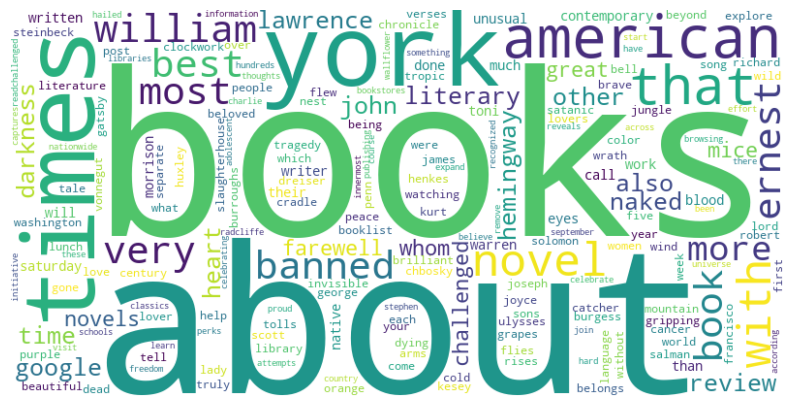

In [133]:
# create a word cloud
# create dictionary with word counts
gb_word_freq = dict(zip(google_books_df['word'], google_books_df['count']))
print(gb_word_freq)

# generate wordclound using WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate_from_frequencies(gb_word_freq)

# use matplotlib to display the wordcloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()